# Setting up Variables and Functions

In [2]:
# Importing Pandas to create DataFrame
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

A_VALUE = 50 # remains the same
B_VALUE = 100 
C_VALUE = 300

A_VALUE_S = 50 # remains the same
B_VALUE_S = 0 
C_VALUE_S = 3000


BETA1 = 1
BETA2 = 0.01
BETA3 = 0.01
BETA4 = 0.01
BETA_S = 0.001

### Calculating X and Reputation Score for Buyers/Sellers

In [3]:
'''
Account Age Increment: in Months 
Time_btwn_transactions: in hours
price: in wei (min:100)
'''

def calculateRep_Buyer(old_x, time_btwn_transactions, account_age, price):
    temp1 = time_btwn_transactions/math.sqrt(1+time_btwn_transactions**2)
    if price>=2**112:
        price = 2**111
    return old_x*time_btwn_transactions*account_age*np.log(1+price)

def calculateX_Seller(oldX, rep_score, rincoming, raverage):
    global BETA_S
    if (rincoming-raverage)==0:
        return oldX
    return oldX + ((100/(rincoming-raverage))-1)*rep_score*BETA_S


# calculating reputation score 

# def calculateRep_Buyer(x):
#     global A_VALUE, B_VALUE, C_VALUE
#     a = A_VALUE
#     b = B_VALUE
#     c = C_VALUE
#     temp1 = x-b
#     temp2 = c + (x-b)*(x-b)
#     temp3 = temp1/math.sqrt(temp2)
#     temp4 = temp3 +1
#     return a * temp4


def calculateRep_Seller(x):
    global A_VALUE_S, B_VALUE_S, C_VALUE_S
    a = A_VALUE_S
    b = B_VALUE_S
    c = C_VALUE_S
    temp1 = x-b
    temp2 = c + (x-b)*(x-b)
    temp3 = temp1/math.sqrt(temp2)
    temp4 = temp3 +1
    return a * temp4
    

### Calculating X and Reputation Score for Sellers

In [4]:
AVG_REVIEW = 50 #start 
OLD_X = 0 #start
R_INCOMING = 99
REP_SCORE = 99
AVG_REVIEW = calculateRep_Seller(calculateX_Seller(OLD_X, REP_SCORE, R_INCOMING, AVG_REVIEW))
print(AVG_REVIEW)

50.09406279929258


# Simulation 1: Can a user artificially inflate his reputation score within a short period of time? 


**Considerations**
1. If so, what is the tolerance?
2. How long before the reputation can be increased?


In [5]:
#declaring first time user parameters
user_age = 0
user_total_price_reviews = 0
total_reviews = 0
user_x = 0
user_rep = 0
price_of_product=2322070000000000

repList = []
xList = []
repList.append(0)
xList.append(0)

A_VALUE = 50 # remains the same
B_VALUE = 100
C_VALUE = 1000

while user_rep < 90:
    total_reviews += 1
    user_rep = calculateRep_Buyer(user_x, 1, 0, price_of_product)
    repList.append(user_rep)

        
print("Number of transactions needed: ", len(repList)-1)
print("Number of hours: ",(len(repList)-1))
print("Number of days: ", (len(repList)-1)/24)


x = [i for i in range(len(repList))]
y = repList
plt.plot(x,y)
plt.xlabel("Number of Transactions")
plt.ylabel("Reputation score")

NameError: name 'calculateX_Buyer' is not defined

However, the above values depend significantly on the hyperparameters:
1. B_VALUE
2. C_VALUE
3. BETA1
4. BETA2
5. BETA3
6. BETA4

In [30]:
# keeping Beta 1 to Beta 4 the same, and C_Value the same 
# we can see how the B_Value will change the effect
# the user spamming the system every hour

df = pd.DataFrame(columns = ['B_VALUE', 'C_VALUE', 'BETA1', 'BETA2', 'BETA3', 'BETA4', 'transactions', 'ETH', 'User_age', 'hours', 'days'])

def sim1(b, c, b1):
    global B_VALUE, C_VALUE, BETA1, BETA2, BETA3, BETA4
    B_VALUE = b
    C_VALUE = c
    BETA1 = b1
    user_age = 0
    total_time_passed = 0.0
    user_x = 0
    user_rep = 0
    repList = []
    xList = []
    price =2322070000000000
    while user_rep < 99:
        total_time_passed += 1.0
        user_age = total_time_passed/24/30 #divide by 24 hours, divide by 30days
        
        user_x = calculateX_Buyer(user_x, 1, int(user_age), price)
        xList.append(user_x)
        user_rep = calculateRep_Buyer(user_x)
        repList.append(user_rep)
        
    return len(repList), (len(repList))*2322070000000000/(10**18), total_time_passed, total_time_passed/24, user_age

#the user tries to inflate within a month and price 100wei, time between transactions is one hour
for b in range(100, 1500, 50):
    for c in range(100, 1500, 50):
        b1 = 1
        for b2 in [0.01, 0.1]:
            for b3 in [0.01, 0.1]:
                for b4 in [0.01, 0.1]:
                    transactions, ETH, hours, days, user_age = sim1(b, c, b1)
                    df.loc[len(df)] = [b, c, b1, b2, b3, b4, transactions, ETH, user_age, hours, days]
    
df

,B_VALUE,C_VALUE,BETA1,BETA2,BETA3,BETA4,transactions,ETH,User_age,hours,days
0,100.0,100.0,1.0,0.01,0.01,0.01,411.0,0.954371,0.570833,411.0,17.125000
1,100.0,100.0,1.0,0.01,0.01,0.10,411.0,0.954371,0.570833,411.0,17.125000
2,100.0,100.0,1.0,0.01,0.10,0.01,411.0,0.954371,0.570833,411.0,17.125000
3,100.0,100.0,1.0,0.01,0.10,0.10,411.0,0.954371,0.570833,411.0,17.125000
4,100.0,100.0,1.0,0.10,0.01,0.01,411.0,0.954371,0.570833,411.0,17.125000
...,...,...,...,...,...,...,...,...,...,...,...
6267,1450.0,1450.0,1.0,0.01,0.10,0.10,4219.0,9.796813,5.859722,4219.0,175.791667
6268,1450.0,1450.0,1.0,0.10,0.01,0.01,4219.0,9.796813,5.859722,4219.0,175.791667
6269,1450.0,1450.0,1.0,0.10,0.01,0.10,4219.0,9.796813,5.859722,4219.0,175.791667
6270,1450.0,1450.0,1.0,0.10,0.10,0.01,4219.0,9.796813,5.859722,4219.0,175.791667


In [31]:
df.to_csv('Simulation_1_1Hour.csv')

In [ ]:
# keeping Beta 1 to Beta 4 the same, and C_Value the same 
# we can see how the B_Value will change the effect
# the user spamming the system every 24 hours

df = pd.DataFrame(columns = ['B_VALUE', 'C_VALUE', 'BETA1', 'BETA2', 'BETA3', 'BETA4', 'transactions', 'ETH', 'User_age','hours', 'days'])

def sim1(b, c, b1):
    global B_VALUE, C_VALUE, BETA1, BETA2, BETA3, BETA4
    B_VALUE = b
    C_VALUE = c
    BETA1 = b1
    user_age = 0
    total_time_passed = 0.0
    user_x = 0
    user_rep = 0
    repList = []
    xList = []
    price =2322070000000000
    while user_rep < 99:
        total_time_passed += 24.0
        user_age = total_time_passed/24/30 #divide by 24 hours, divide by 30days
        
        user_x = calculateX_Buyer(user_x, 24, int(user_age), price)
        xList.append(user_x)
        user_rep = calculateRep_Buyer(user_x)
        repList.append(user_rep)
        
    return len(repList), (len(repList))*2322070000000000/(10**18), total_time_passed, total_time_passed/24, user_age

for b in range(5, 200, 5):
    for c in range(5, 200, 5):
        b1 = 1
        for b2 in [0.01, 0.1]:
            for b3 in [0.01, 0.1]:
                for b4 in [0.01, 0.1]:
                    transactions, ETH, hours, days, user_age = sim1(b, c, b1)
                    df.loc[len(df)] = [b, c, b1, b2, b3, b4, transactions, ETH, user_age, hours, days]
    
df

In [ ]:
df.to_csv("Simulation_1_24Hour.csv")

In [ ]:
# keeping Beta 1 to Beta 4 the same, and C_Value the same 
# we can see how the B_Value will change the effect
# the user spamming the system at random hours 

df = pd.DataFrame(columns = ['B_VALUE', 'C_VALUE', 'BETA1', 'BETA2', 'BETA3', 'BETA4', 'transactions', 'ETH', 'User_age','timings','hours', 'days'])

def sim1(b, c, b1):
    global B_VALUE, C_VALUE, BETA1, BETA2, BETA3, BETA4
    B_VALUE = b
    C_VALUE = c
    BETA1 = b1
    user_age = 0
    total_time_passed = 0.0
    user_x = 0
    user_rep = 0
    repList = []
    xList = []
    timings = []
    price =2322070000000000
#     Age_List = []
    while user_rep < 99:
        arbitrary_time = np.random.randint(1, 168)
        timings.append(arbitrary_time)
        total_time_passed += arbitrary_time
        user_age = total_time_passed/24/30 #divide by 24 hours, divide by 30days
#         Age_List.append(user_age)
        user_x = calculateX_Buyer(user_x, arbitrary_time, int(user_age), price)
        xList.append(user_x)
        user_rep = calculateRep_Buyer(user_x)
        repList.append(user_rep)
        
    return len(repList), (len(repList))*2322070000000000/(10**18), total_time_passed, total_time_passed/24, user_age, timings



#the user tries to inflate within a month and price 100wei, time between transactions is one hour
for b in range(5, 100, 5):
    for c in range(5, 100, 5):
        b1 = 1
        for b2 in [0.01, 0.1]:
            for b3 in [0.01, 0.1]:
                for b4 in [0.01, 0.1]:
                    transactions, ETH, hours, days, user_age, timings = sim1(b, c, b1)
                    df.loc[len(df)] = [b, c, b1, b2, b3, b4, transactions, ETH, user_age,str(timings), hours, days]
    
df

In [ ]:
df.to_csv("Simulation_1_Arbitrary_Time.csv")

# Simulation 2: Can a user create multiple different accounts, to influence reviews? (spam attack with un trusted users)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?


In [261]:
# For the buyers we set 
A_VALUE = 50 # remains the same
B_VALUE = 5
C_VALUE = 95

A_VALUE_S = 50 # remains the same
B_VALUE_S = 500 #can be fine tuned
C_VALUE_S = 1000 #can be fine tuned


BETA1 = 1
BETA2 = 0.01
BETA3 = 0.01
BETA4 = 0.01
BETA_S = 0.1 #the smaller, means the lower the tolerance for deviation

Total Transactions need to reach review score 99:  10000
Minimum Expenditure (ETH):  23.2207


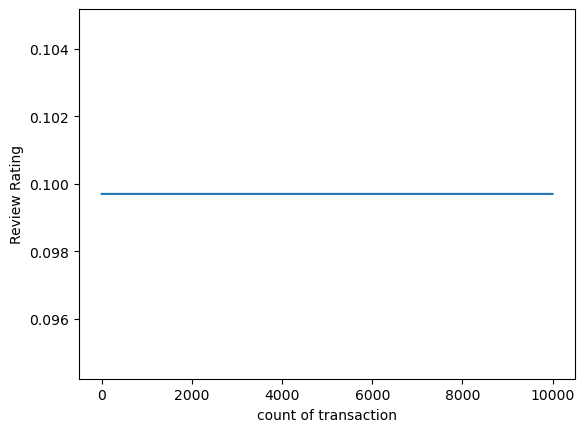

In [262]:
AVG_REVIEW = 0 #start 
OLD_X = 0 #start
R_INCOMING = 100
REP_SCORE = 0
review_list = []
count = 0

while count<10000 and AVG_REVIEW<99:
    count += 1
    X = calculateX_Seller(OLD_X, REP_SCORE, R_INCOMING, AVG_REVIEW)
    AVG_REVIEW = calculateRep_Seller(X)
    OLD_X = X
    review_list.append(AVG_REVIEW)
    
x = [i for i in range(len(review_list))]
y = review_list
plt.plot(x,y)
plt.xlabel("count of transaction")
plt.ylabel("Review Rating")
print("Total Transactions need to reach review score 99: ", len(review_list))
print("Minimum Expenditure (ETH): ", (len(review_list))*2322070000000000/(10**18))

# Simulation 3: Can a user create multiple different accounts, to influence reviews? (spam attack with fully trusted users)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?

Total Transactions need to reach review score 99:  16942
Minimum Expenditure (ETH):  39.34050994
Last review score:  [99.33406956809425]


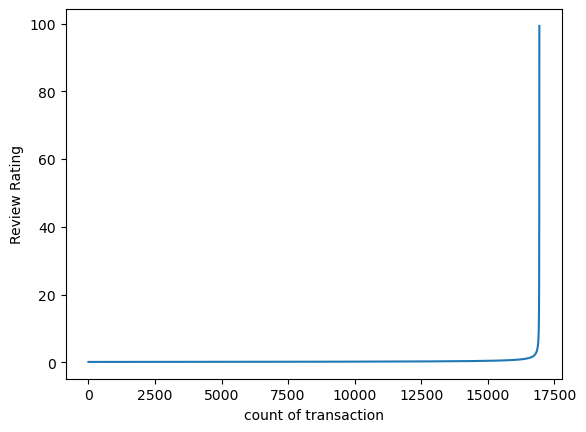

In [265]:

AVG_REVIEW = 0 #start 
OLD_X = 0 #start
R_INCOMING = 100
REP_SCORE = 99
review_list = []
count = 0

while count<5000000000 and AVG_REVIEW<99:
    count += 1
    X = calculateX_Seller(OLD_X, REP_SCORE, R_INCOMING, AVG_REVIEW)
    AVG_REVIEW = calculateRep_Seller(X)
    OLD_X = X
    review_list.append(AVG_REVIEW)
    
x = [i for i in range(len(review_list))]
y = review_list
plt.plot(x,y)
plt.xlabel("count of transaction")
plt.ylabel("Review Rating")
print("Total Transactions need to reach review score 99: ", len(review_list))
print("Minimum Expenditure (ETH): ", (len(review_list))*2322070000000000/(10**18))
print("Last review score: ", review_list[-1:])

# Simulation 4: Can a user create multiple different accounts, to influence reviews? (spam attack with mixed time gaps with low reputation score)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?

# Simulation 5: Can a user create multiple different accounts, to influence reviews? (spam attack with only long time durations between the attacks)

**Considerations**
1. How tolerant is the system?
2. How many accounts is needed before you can significantly increase?
3. What parameters can we set?